In [1]:
import pandas as pd
import tensorflow as tf
from datetime import datetime

In [2]:
df=pd.read_csv('./팔린데이터최종본_cp.csv',encoding='cp949')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [26]:
df

,판매일,기간,차량/세부모델,미션,연식,연료,주행거리,색상,가격,차종
0,2021.5.1,152,[현대]그랜저HG HG300 EXCLUSIVE [무],오토,2013,휘발유,192814,흰색,880,그랜저
1,2021.5.1,67,[벤츠]E-클래스(W213) E300 4MATIC 아방가르드,오토,2018,휘발유,16589,흰색,5450,E-클래스
2,2021.5.1,47,[재규어]뉴XF 3.0 D 프리미엄 [무],오토,2012,경유,180000,흰색,920,XF
3,2021.5.1,47,[현대]그랜저IG 2.2 VGT 프리미엄,오토,2017,경유,98092,검정색,9999,그랜저
4,2021.5.1,46,[쌍용]체어맨H 뉴클래식 500S 최고급형 [무],오토,2011,휘발유,145253,검정색,390,체어맨
...,...,...,...,...,...,...,...,...,...,...
67111,2022.5.9,24,뉴쏘렌토 2WD 2.5 VGT,오토,2008,경유,224271,검정투톤,220,쏘렌토
67112,2022.5.9,24,더뉴트랙스 1.4 LT 코어,오토,2019,휘발유,41000,흰색,1390,트랙스
67113,2022.5.9,17,뉴A6 35 TDI 프리미엄 [무],오토,2015,경유,129001,흰색,2250,A6
67114,2022.5.9,38,더 럭셔리 그랜저 Q270 LUXURY 스마트팩,오토,2010,휘발유,110000,흰색,669,그랜저


In [27]:
grand=df[df['차종']=='E-클래스']

In [28]:
grand

,판매일,기간,차량/세부모델,미션,연식,연료,주행거리,색상,가격,차종
1,2021.5.1,67,[벤츠]E-클래스(W213) E300 4MATIC 아방가르드,오토,2018,휘발유,16589,흰색,5450,E-클래스
10,2021.5.1,33,[벤츠]E-클래스(W213) E300 4MATIC 아방가르드 [무],오토,2018,휘발유,29000,흰색,5290,E-클래스
33,2021.5.2,9,[벤츠]뉴E-클래스 E200 CGI,오토,2014,휘발유,129000,은색,1490,E-클래스
53,2021.5.3,49,[벤츠]E-클래스(W213) E220D 4MATIC 아방가르드 [무],오토,2018,경유,143213,흰색,3490,E-클래스
261,2021.5.3,39,[벤츠]E-클래스(W213) E300 4MATIC 아방가르드 [무],오토,2017,휘발유,49864,검정색,11,E-클래스
...,...,...,...,...,...,...,...,...,...,...
66897,2022.5.9,33,E-클래스(W213) E220D 아방가르드 [무],오토,2016,경유,181007,검정색,2790,E-클래스
66907,2022.5.9,24,뉴E-클래스 E250 블루텍 4MATIC 아방가르드 [무],오토,2016,경유,133636,검정색,1990,E-클래스
66909,2022.5.9,41,GLE-클래스(V167) GLE400d 4MATIC 쿠페 [무],오토,2021,경유,11000,다크그레이,10900,E-클래스
67044,2022.5.9,63,뉴E-클래스 E300 아방가르드,오토,2014,휘발유,78432,검정색,1690,E-클래스


In [29]:
tmp=list(grand.groupby('판매일').mean().index)

In [30]:
grand.dtypes

판매일        object
기간          int64
차량/세부모델    object
미션         object
연식          int64
연료         object
주행거리        int64
색상         object
가격          int64
차종         object
dtype: object

In [31]:
grand['판매일']=pd.to_datetime(grand['판매일'])

/var/folders/cx/8fgbz3112jxdssn1ym77_0zc0000gn/T/ipykernel_86054/1263492065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grand['판매일']=pd.to_datetime(grand['판매일'])


In [32]:
sample=grand.groupby('판매일').mean().sort_values(by='판매일',ascending=True)

In [33]:
grand.groupby('판매일').count()['기간']

판매일
2021-05-01    2
2021-05-02    1
2021-05-03    3
2021-05-04    2
2021-05-06    3
             ..
2022-05-02    5
2022-05-03    2
2022-05-04    3
2022-05-06    1
2022-05-09    5
Name: 기간, Length: 239, dtype: int64

In [34]:
sample['갯수']=grand.groupby('판매일').count()['기간']

In [35]:
sample

,기간,연식,주행거리,가격,갯수
판매일,,,,,
2021-05-01,50.000000,2018.000000,22794.500000,5370.000000,2
2021-05-02,9.000000,2014.000000,129000.000000,1490.000000,1
2021-05-03,78.000000,2016.000000,123589.666667,1480.333333,3
2021-05-04,53.000000,2017.000000,52677.500000,3850.000000,2
2021-05-06,42.666667,2018.333333,66935.000000,4870.000000,3
...,...,...,...,...,...
2022-05-02,266.000000,2013.000000,112620.600000,2360.000000,5
2022-05-03,37.000000,2016.000000,76917.500000,3400.000000,2
2022-05-04,88.333333,2014.333333,99715.666667,1370.000000,3


In [36]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
values=sample.values

In [38]:
scaler=MinMaxScaler()

In [39]:
values_scaled=scaler.fit_transform(values)

In [40]:
seq_length=7

In [41]:
x,y=[],[]
for i in range(0,len(values)-seq_length):
    start,end=i,i+seq_length
    x.append(values_scaled[start:end])
    y.append(values_scaled[end,-2])

In [42]:
x,y=np.array(x),np.array(y)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False,random_state=0)

In [44]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50,input_shape=(seq_length,5),return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=model.fit(x_train,y_train,epochs=50,batch_size=20,validation_split=0.2,verbose=2)

Epoch 1/50
8/8 - 1s - loss: 0.0116 - mae: 0.0763 - val_loss: 0.0032 - val_mae: 0.0406 - 662ms/epoch - 83ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0092 - mae: 0.0662 - val_loss: 0.0033 - val_mae: 0.0383 - 25ms/epoch - 3ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0096 - mae: 0.0643 - val_loss: 0.0035 - val_mae: 0.0437 - 21ms/epoch - 3ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0081 - mae: 0.0594 - val_loss: 0.0031 - val_mae: 0.0375 - 21ms/epoch - 3ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0082 - mae: 0.0607 - val_loss: 0.0030 - val_mae: 0.0374 - 21ms/epoch - 3ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0085 - mae: 0.0602 - val_loss: 0.0033 - val_mae: 0.0424 - 21ms/epoch - 3ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0086 - mae: 0.0593 - val_loss: 0.0031 - val_mae: 0.0404 - 21ms/epoch - 3ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0082 - mae: 0.0602 - val_loss: 0.0031 - val_mae: 0.0406 - 21ms/epoch - 3ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0084 - mae: 0.0597 - val_loss: 0.0031 - val_mae: 0.0375 - 21ms/epoch - 3ms/step
Epoch 10

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


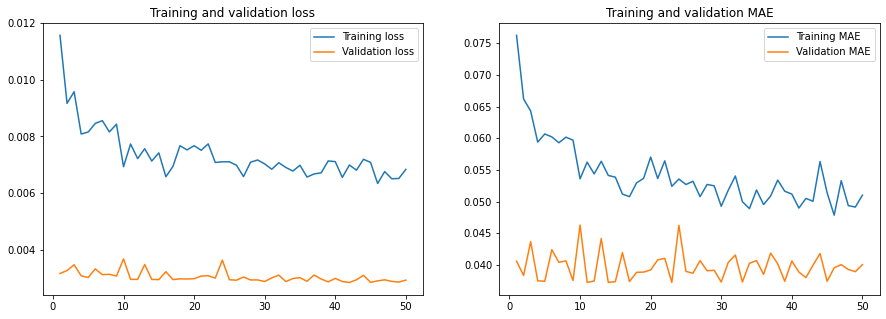

In [46]:
print(history.history.keys())
mae=history.history['mae']
val_mae=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,mae,label='Training MAE')
plt.plot(epochs,val_mae,label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

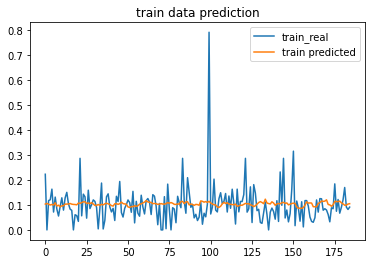

In [49]:
train_predict=model.predict(x_train)

plt.plot(y_train,label='train_real')
plt.plot(train_predict,label='train predicted')
plt.title('train data prediction')
plt.legend()

Text(0.5, 1.0, 'test data prediction')

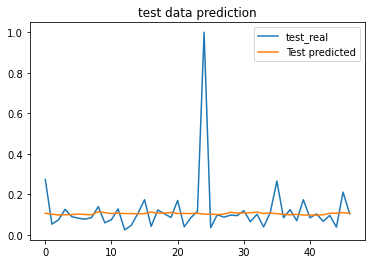

In [50]:
test_predict=model.predict(x_test)

plt.plot(y_test,label='test_real')
plt.plot(test_predict,label='Test predicted')
plt.legend()
plt.title('test data prediction')